In [26]:
import toml
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
folder = Path('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01')

In [5]:
subfolders = [f for f in folder.glob('*/') if f.is_dir()]

In [6]:
subfolders

[PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/3f32c8a4-3168-433a-bb9a-ff55825aaa3f'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/94fb1046-b174-426e-a11f-9197c4661fe4'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/968204b9-1410-426a-88ac-f87ff718bc1a'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/f263d80f-157f-4bf3-8036-fb7f84c32abf'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/5be269c4-da29-43fa-8a93-3e45e4736cd1'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/afc00102-8b08-49db-a464-dd829ee7327a'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/fd35bf21-eafa-4c10-982a-14053dc2a933'),
 PosixPath('/n/groups/datta/win/longtogeny/size_norm/models/param_scan_02/stage_01/138f2948-2e14-405b-85ea-d8307ceef2e9'),
 PosixPath('/n/g

In [38]:
def get_mag(s):
    if s == 'K':
        return 1e3
    elif s == 'M':
        return 1e6
    else:
        raise NotImplemented()

In [40]:
# relevant parameters are: lightning/arch, model/depth
results = []
for f in subfolders:
    config = toml.load(f / "config.toml")
    mse = pd.read_csv(f / "size_norm_scan" / "version_0" / "metrics.csv").min()['val_loss']
    validation = pd.read_parquet(f / "test" / "behavior_validation_results.parquet").mean(numeric_only=True)
    with open(list(f.glob('model*.out'))[0], 'r') as out_f:
        for line in out_f.readlines():
            if "Total params" in line:
                params = line.split(' ')[:2]
                params = float(params[0]) * get_mag(params[1])
    results.append(dict(
        depth=config['model']['depth'],
        arch=config['model']['lightning']['arch'],
        mse=mse,
        heldout_beh_val=validation['heldout_score'],
        fit_beh_val=validation['fit_score'],
        param_count=params,
    ))
results = pd.DataFrame(results)

In [41]:
results

,depth,arch,mse,heldout_beh_val,fit_beh_val,param_count
0,3,ae,0.001588,0.184957,0.575225,6500.0
1,2,ae,0.003316,0.493949,0.786491,3000.0
2,2,efficient,0.003253,0.339143,0.661141,31500.0
3,3,unet,0.001610,0.218292,0.630855,7500.0
4,1,ae,0.007100,0.499156,0.772751,1800.0
5,4,unet,0.001388,0.140305,0.515796,20500.0
6,1,efficient,0.006124,0.062391,0.389974,15900.0
7,1,unet,0.010725,0.387381,0.693722,2200.0
8,2,unet,0.004591,0.377908,0.751900,3500.0
9,3,efficient,0.001371,0.173584,0.561678,54200.0


[None, None]

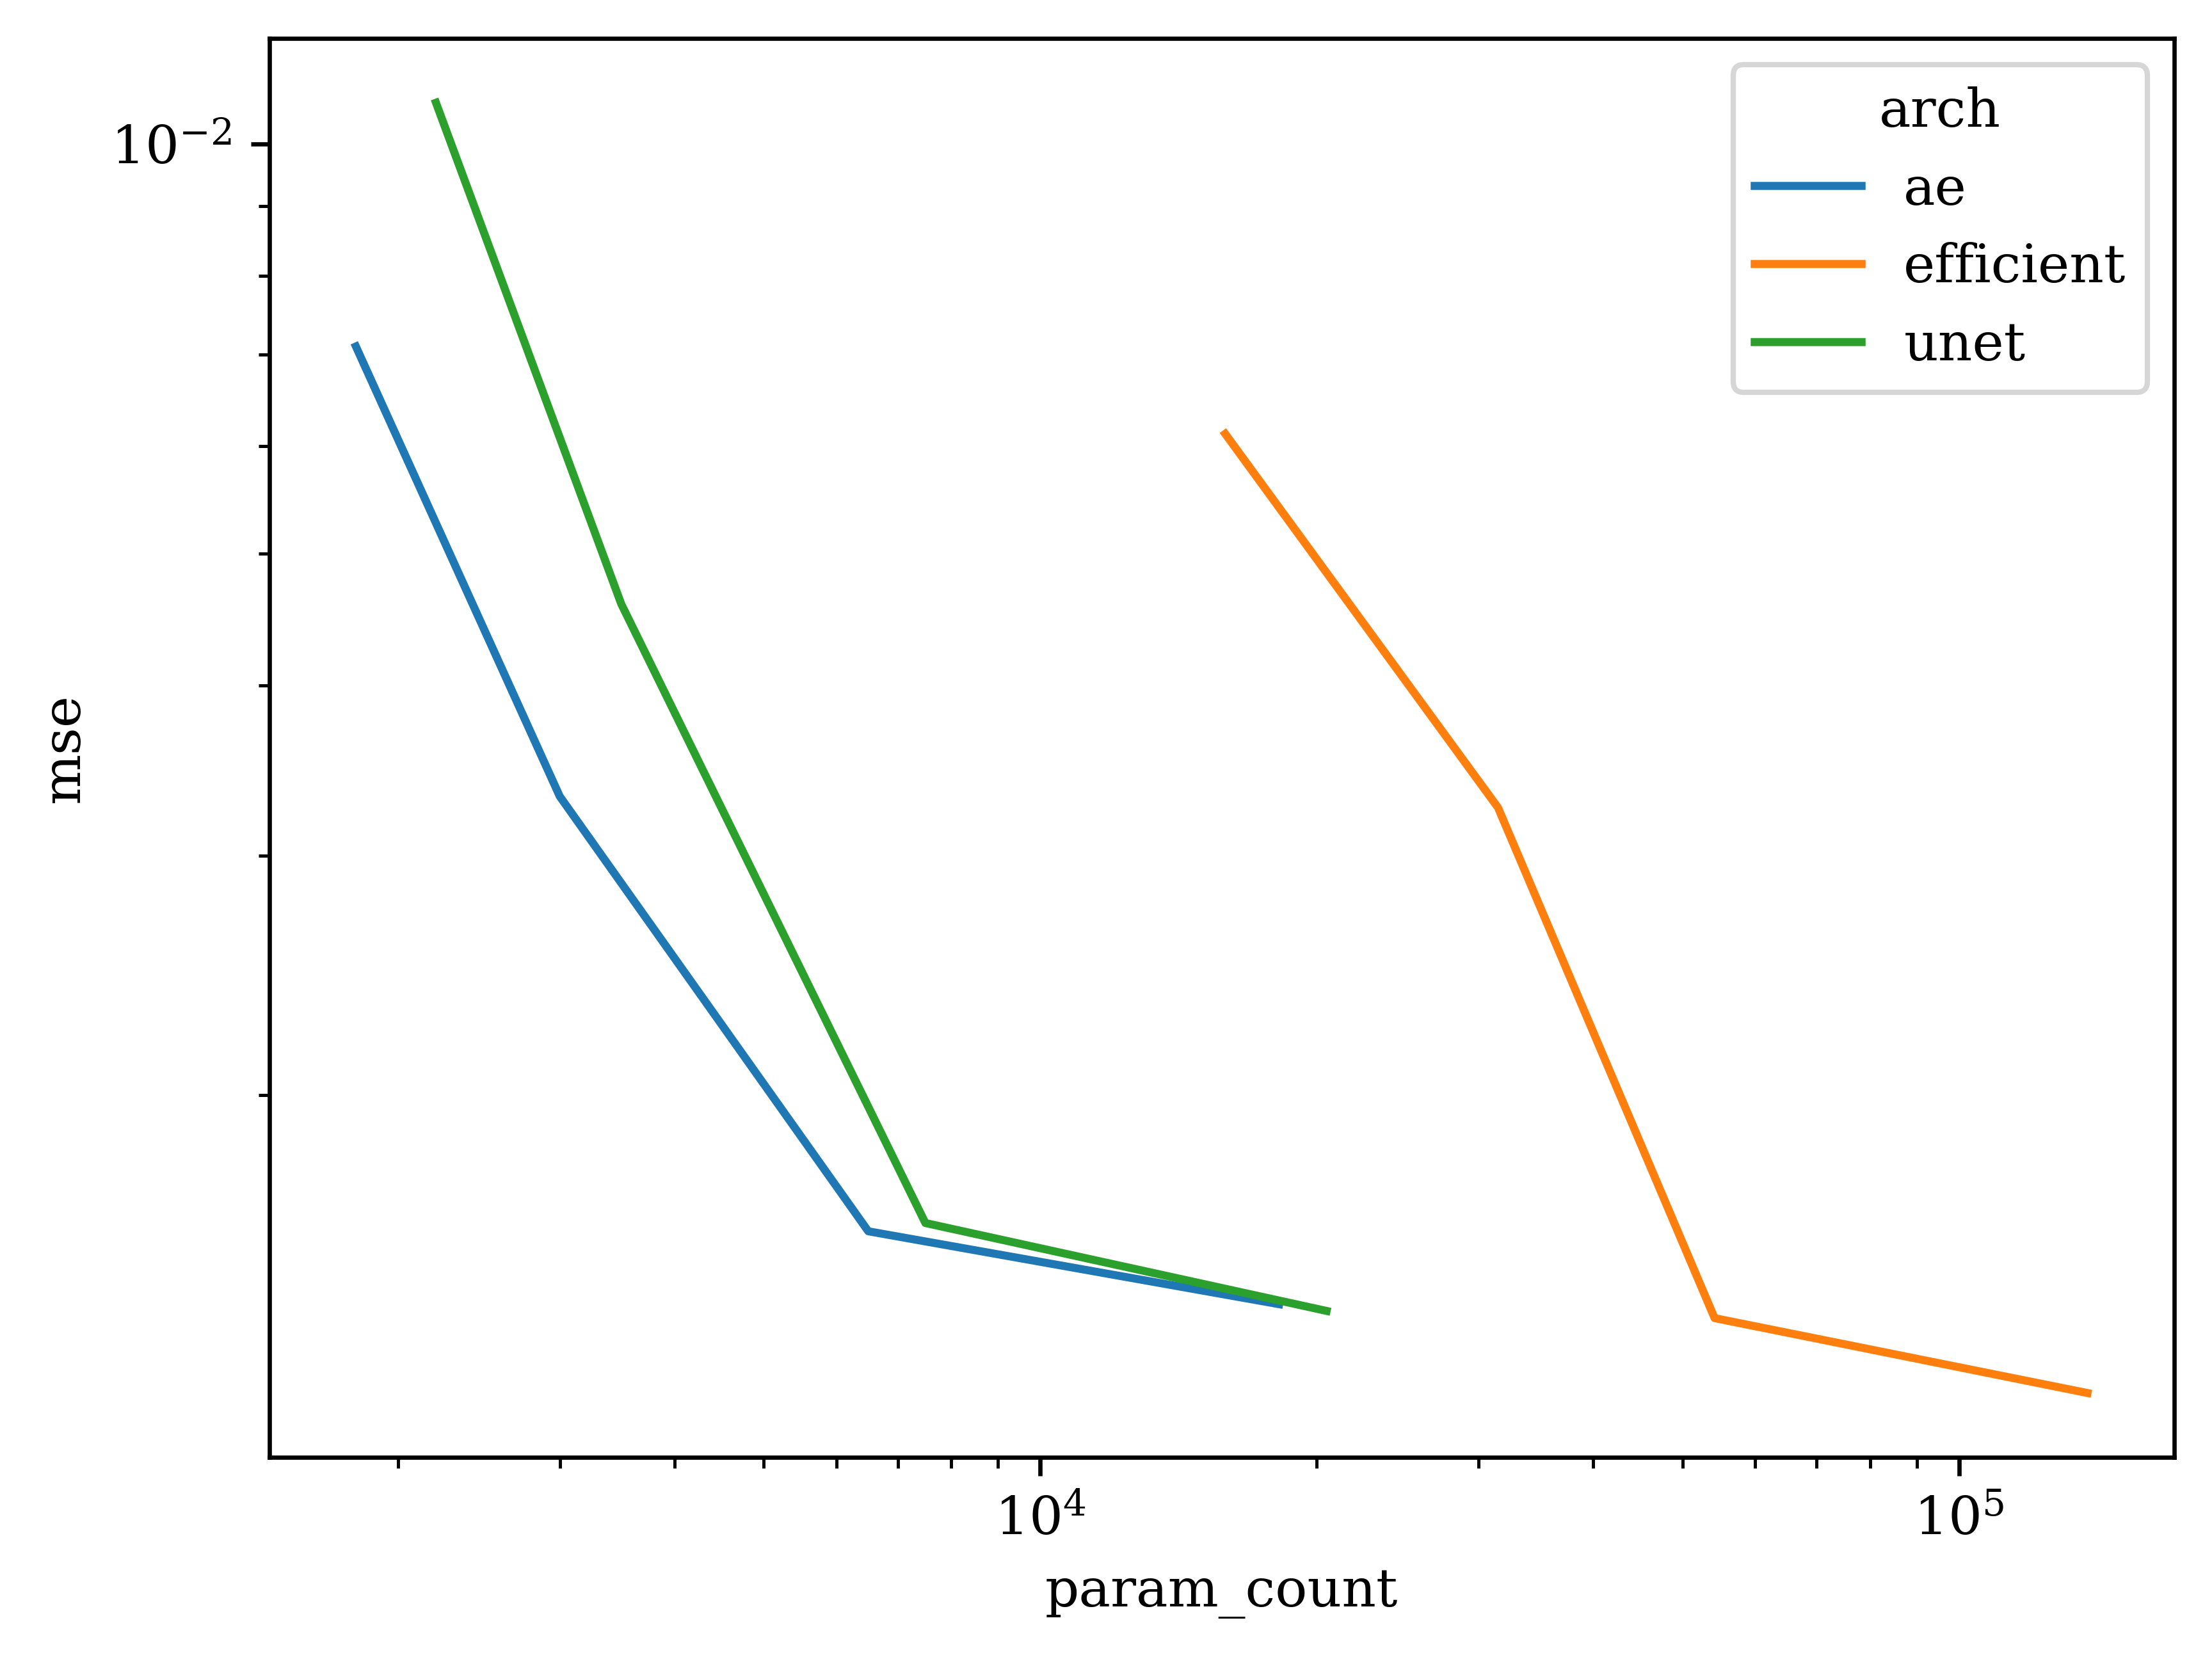

In [46]:
ax = sns.lineplot(data=results, x='param_count', y='mse', hue='arch')
ax.set(yscale='log', xscale='log')

[None]

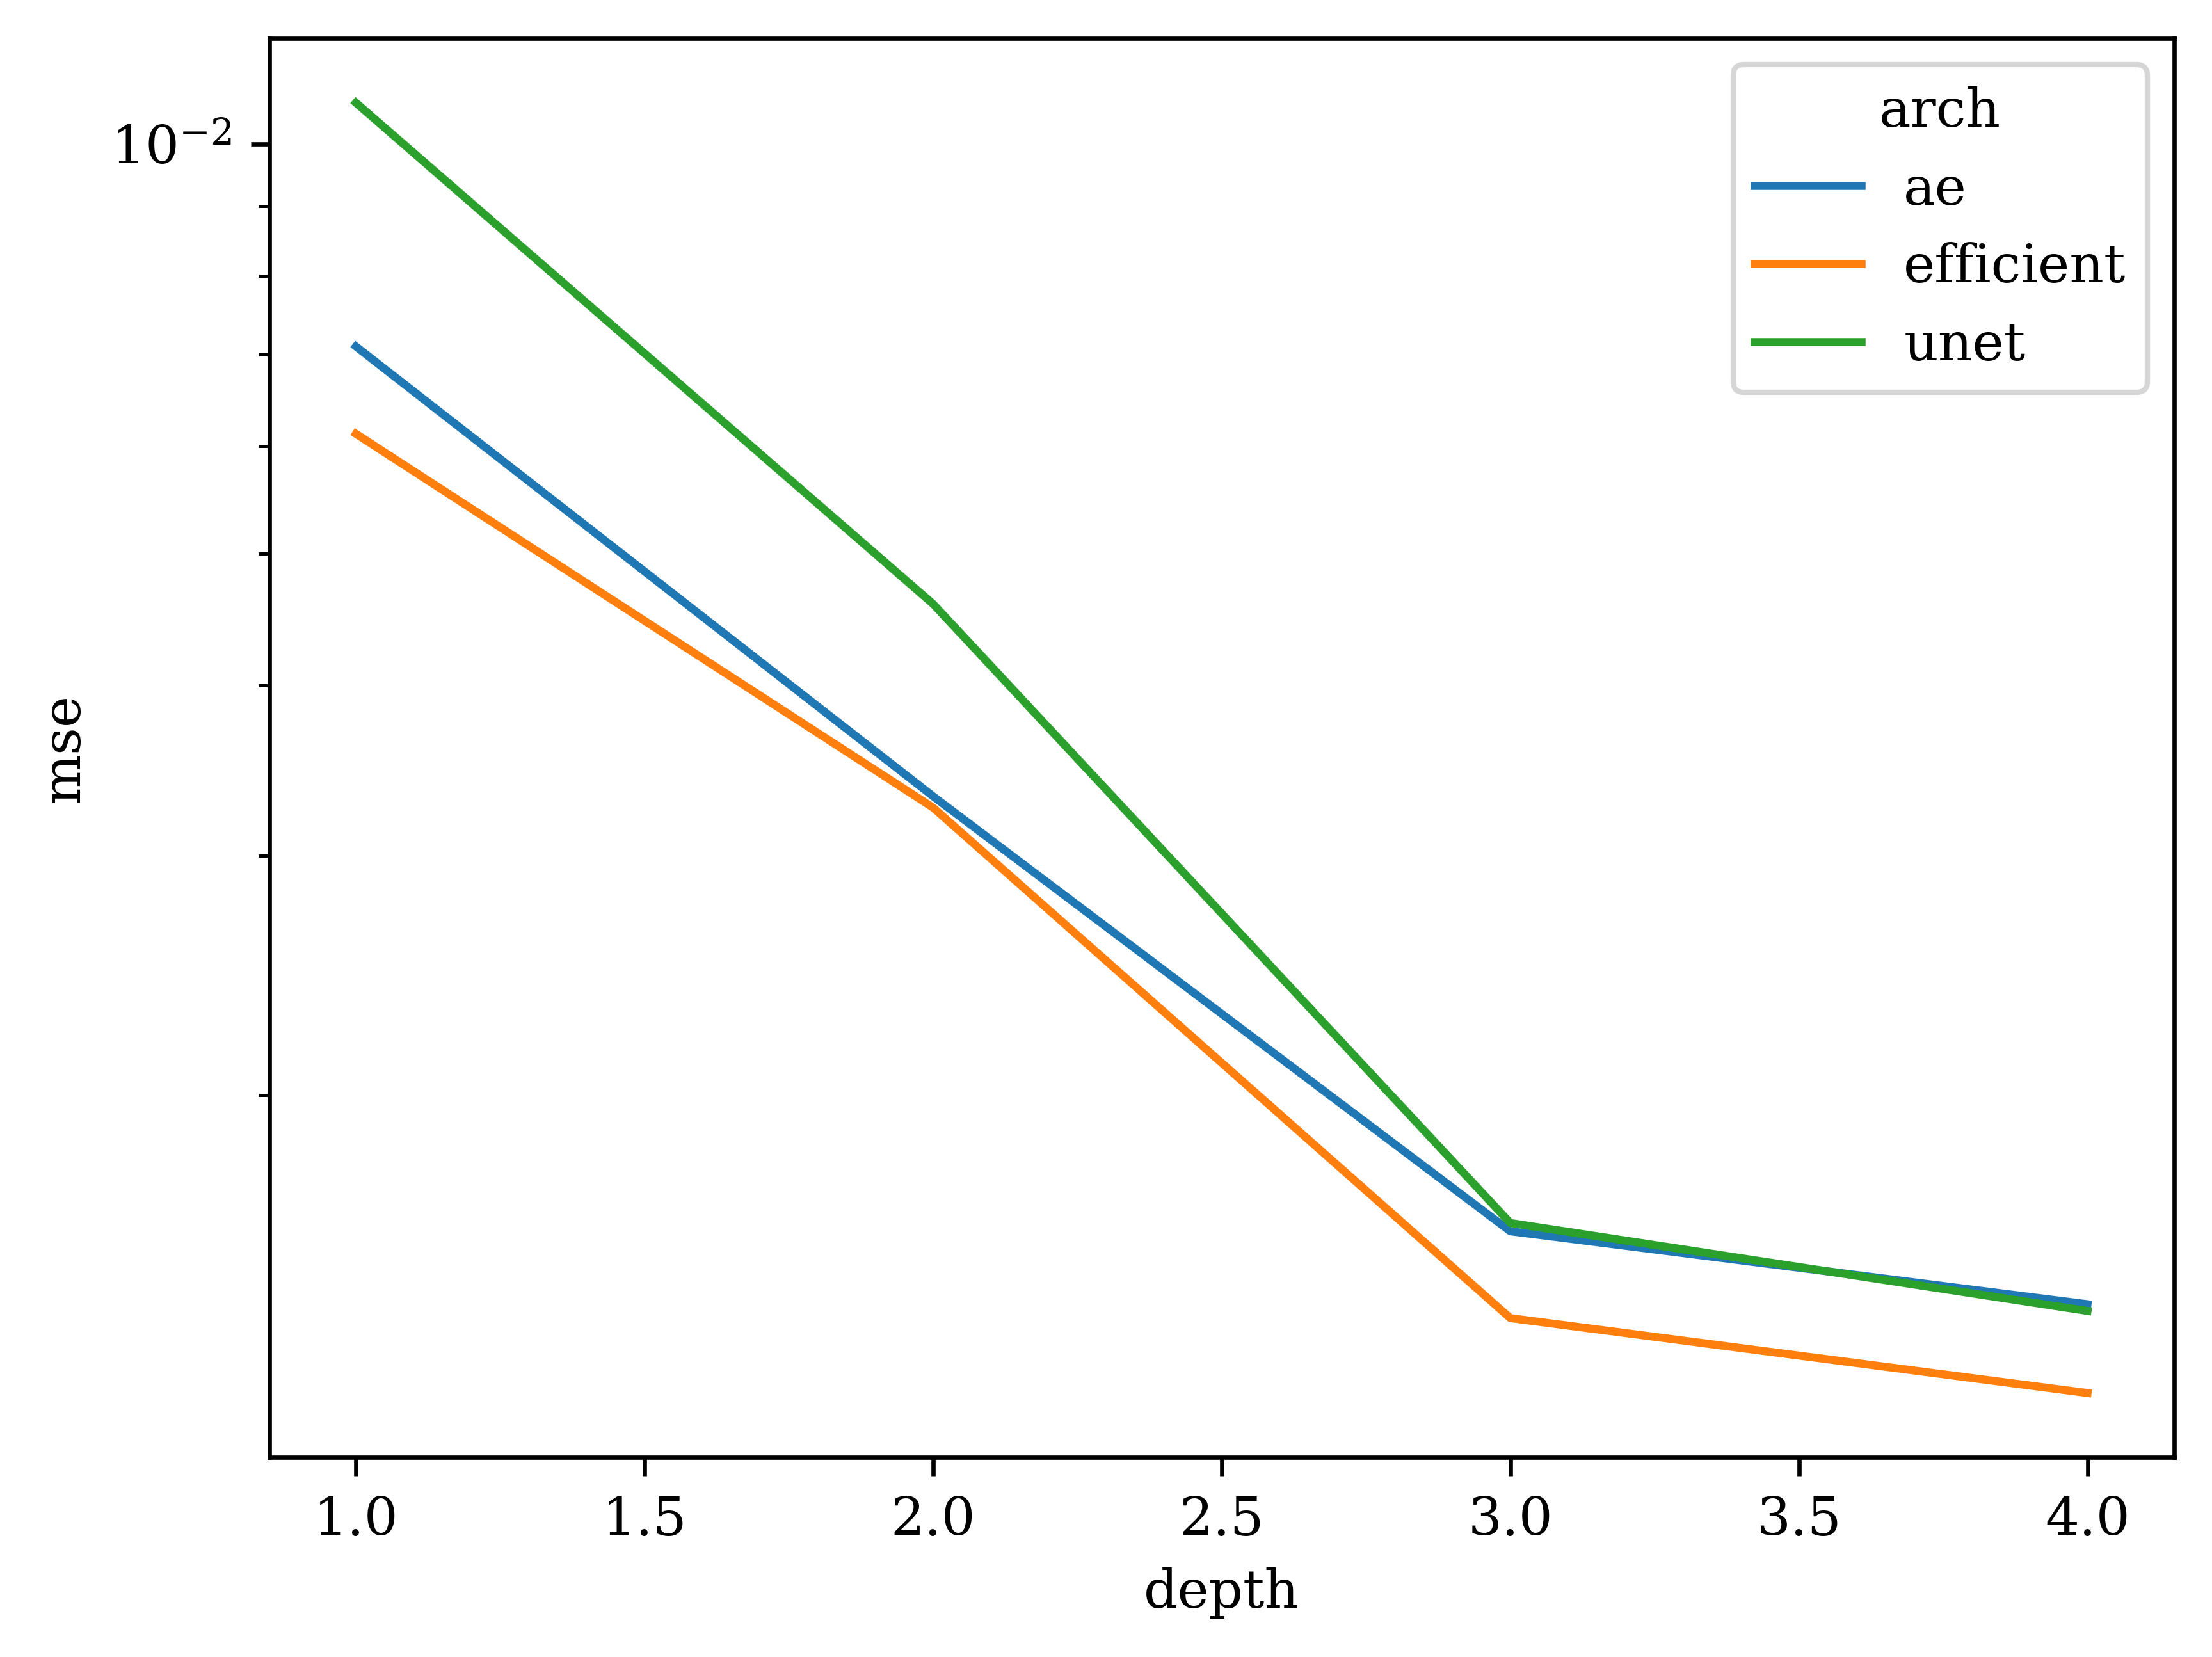

In [47]:
ax = sns.lineplot(data=results, x='depth', y='mse', hue='arch')
ax.set(yscale='log')

## Validation analysis

In [48]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   depth            12 non-null     int64  
 1   arch             12 non-null     object 
 2   mse              12 non-null     float64
 3   heldout_beh_val  12 non-null     float64
 4   fit_beh_val      12 non-null     float64
 5   param_count      12 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 704.0+ bytes


[None]

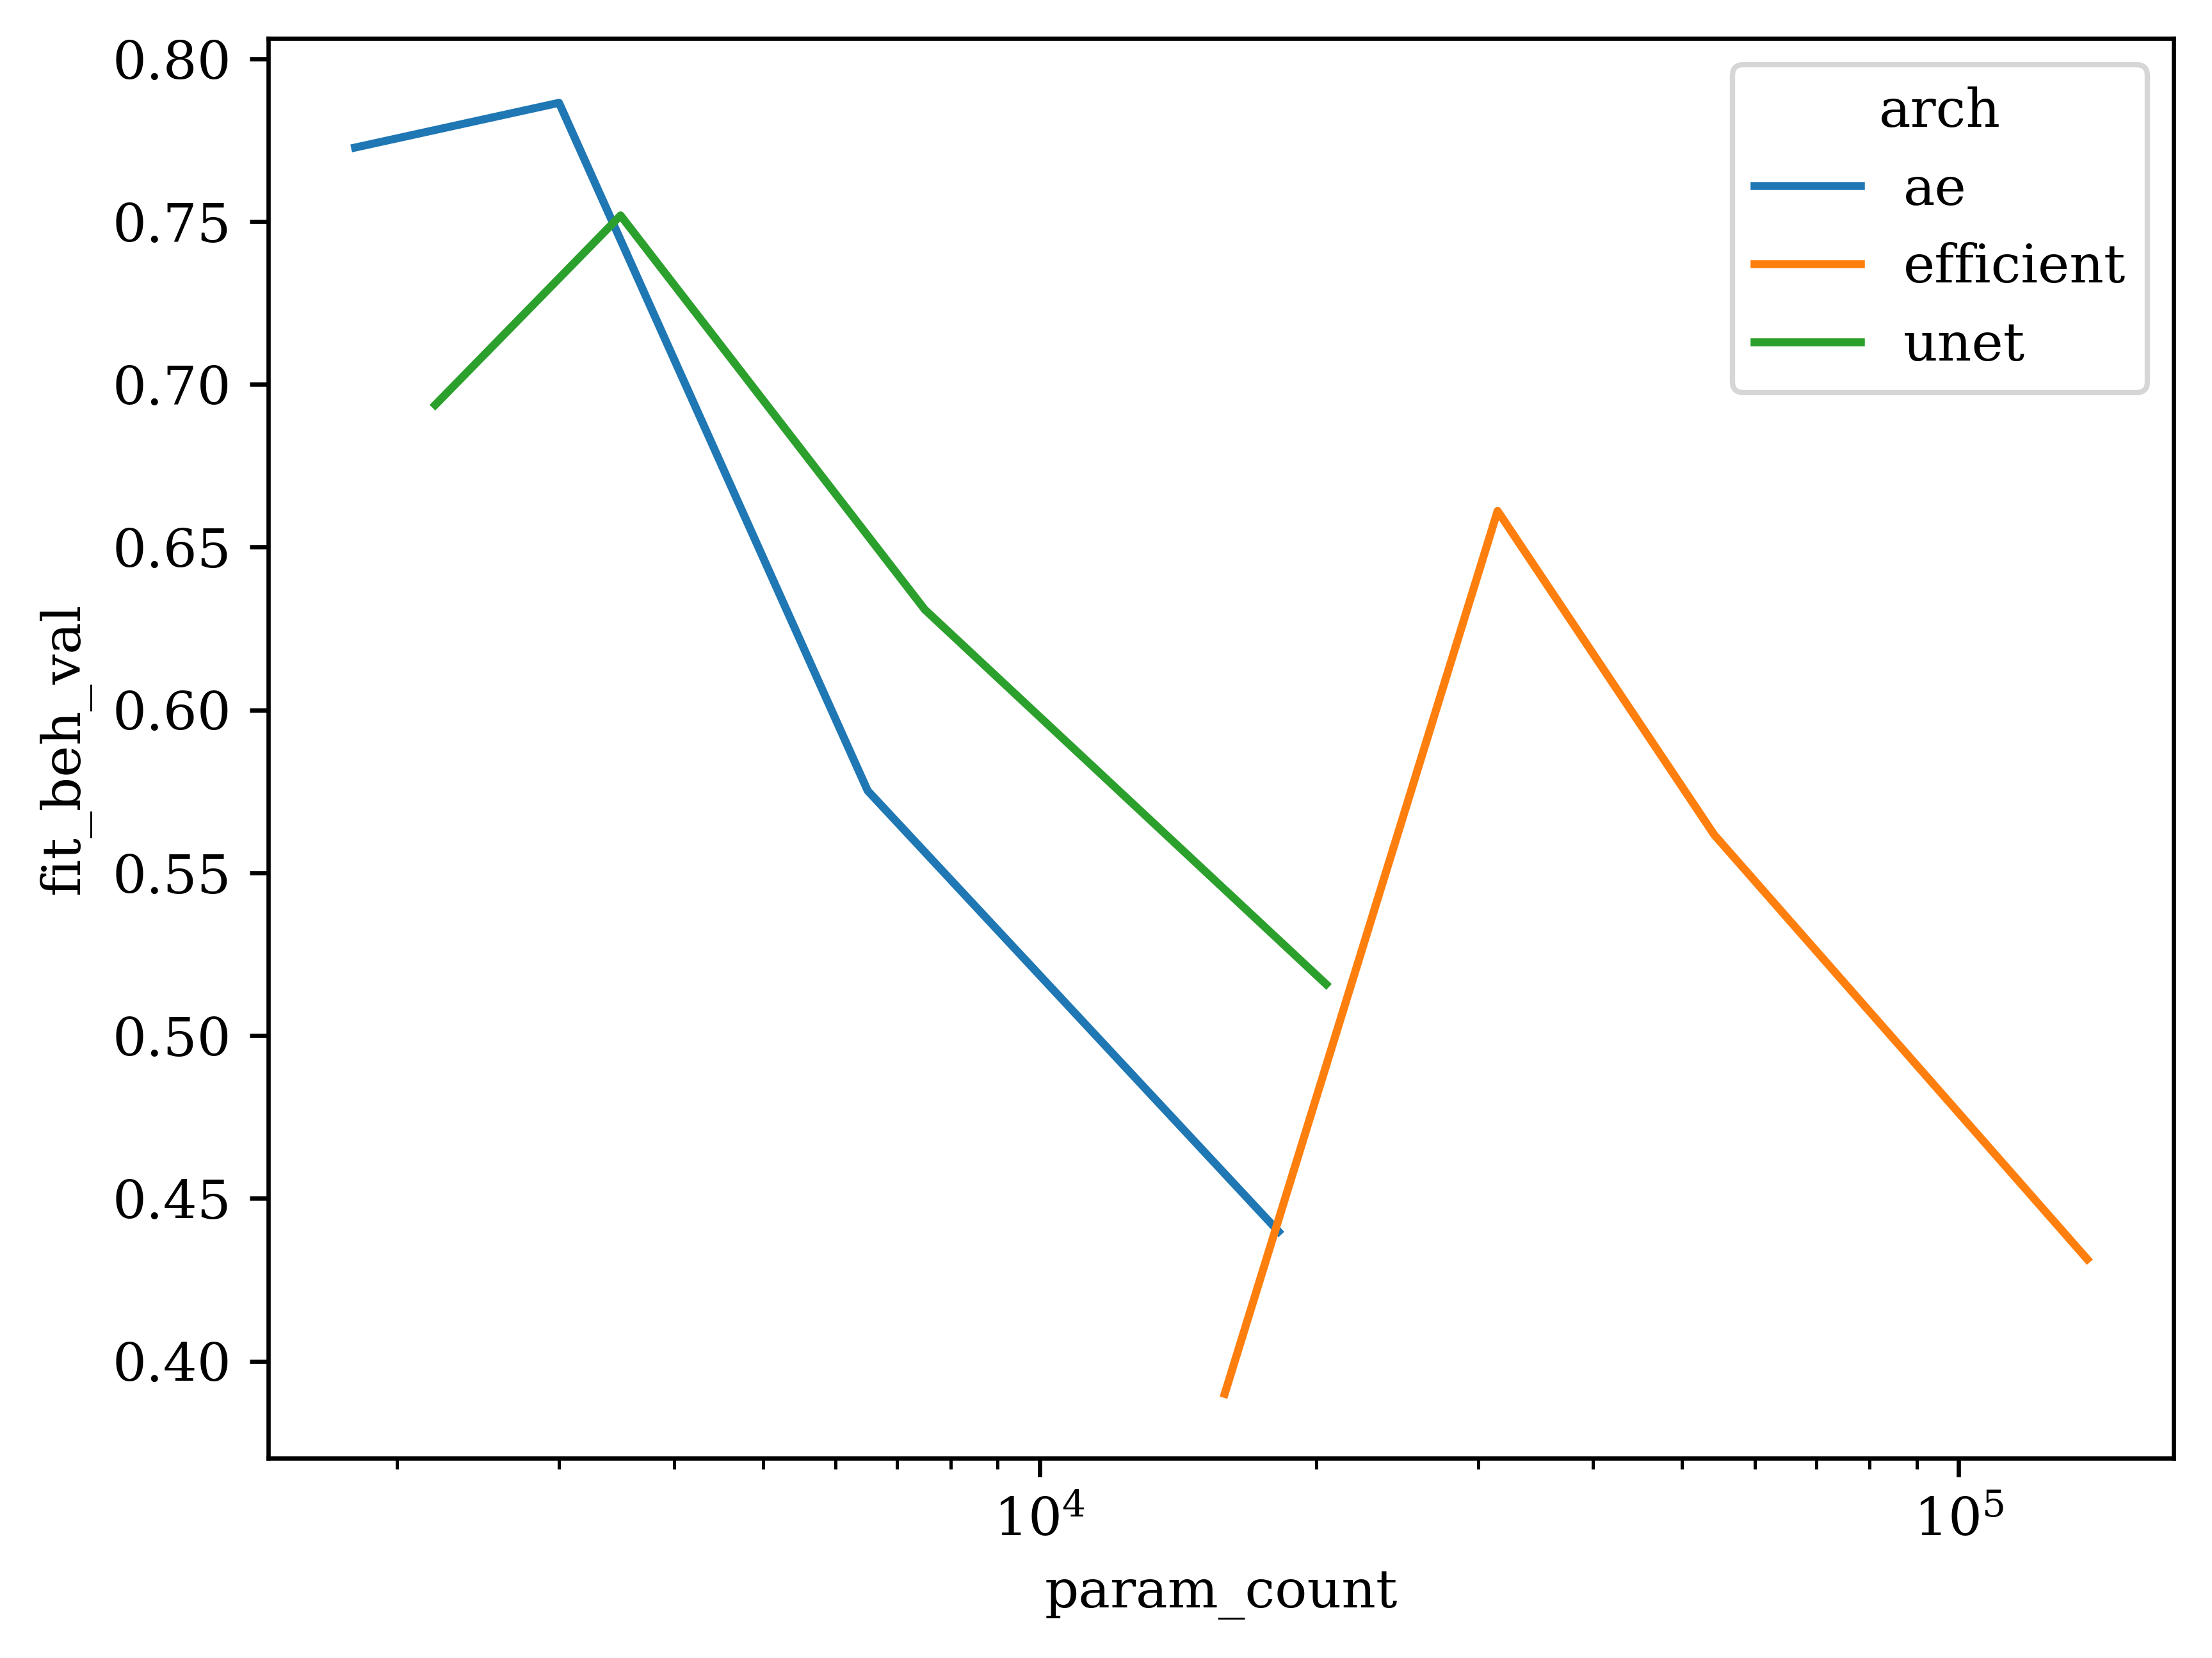

In [52]:
ax = sns.lineplot(data=results, x='param_count', y='fit_beh_val', hue='arch')
ax.set(xscale='log')

[None]

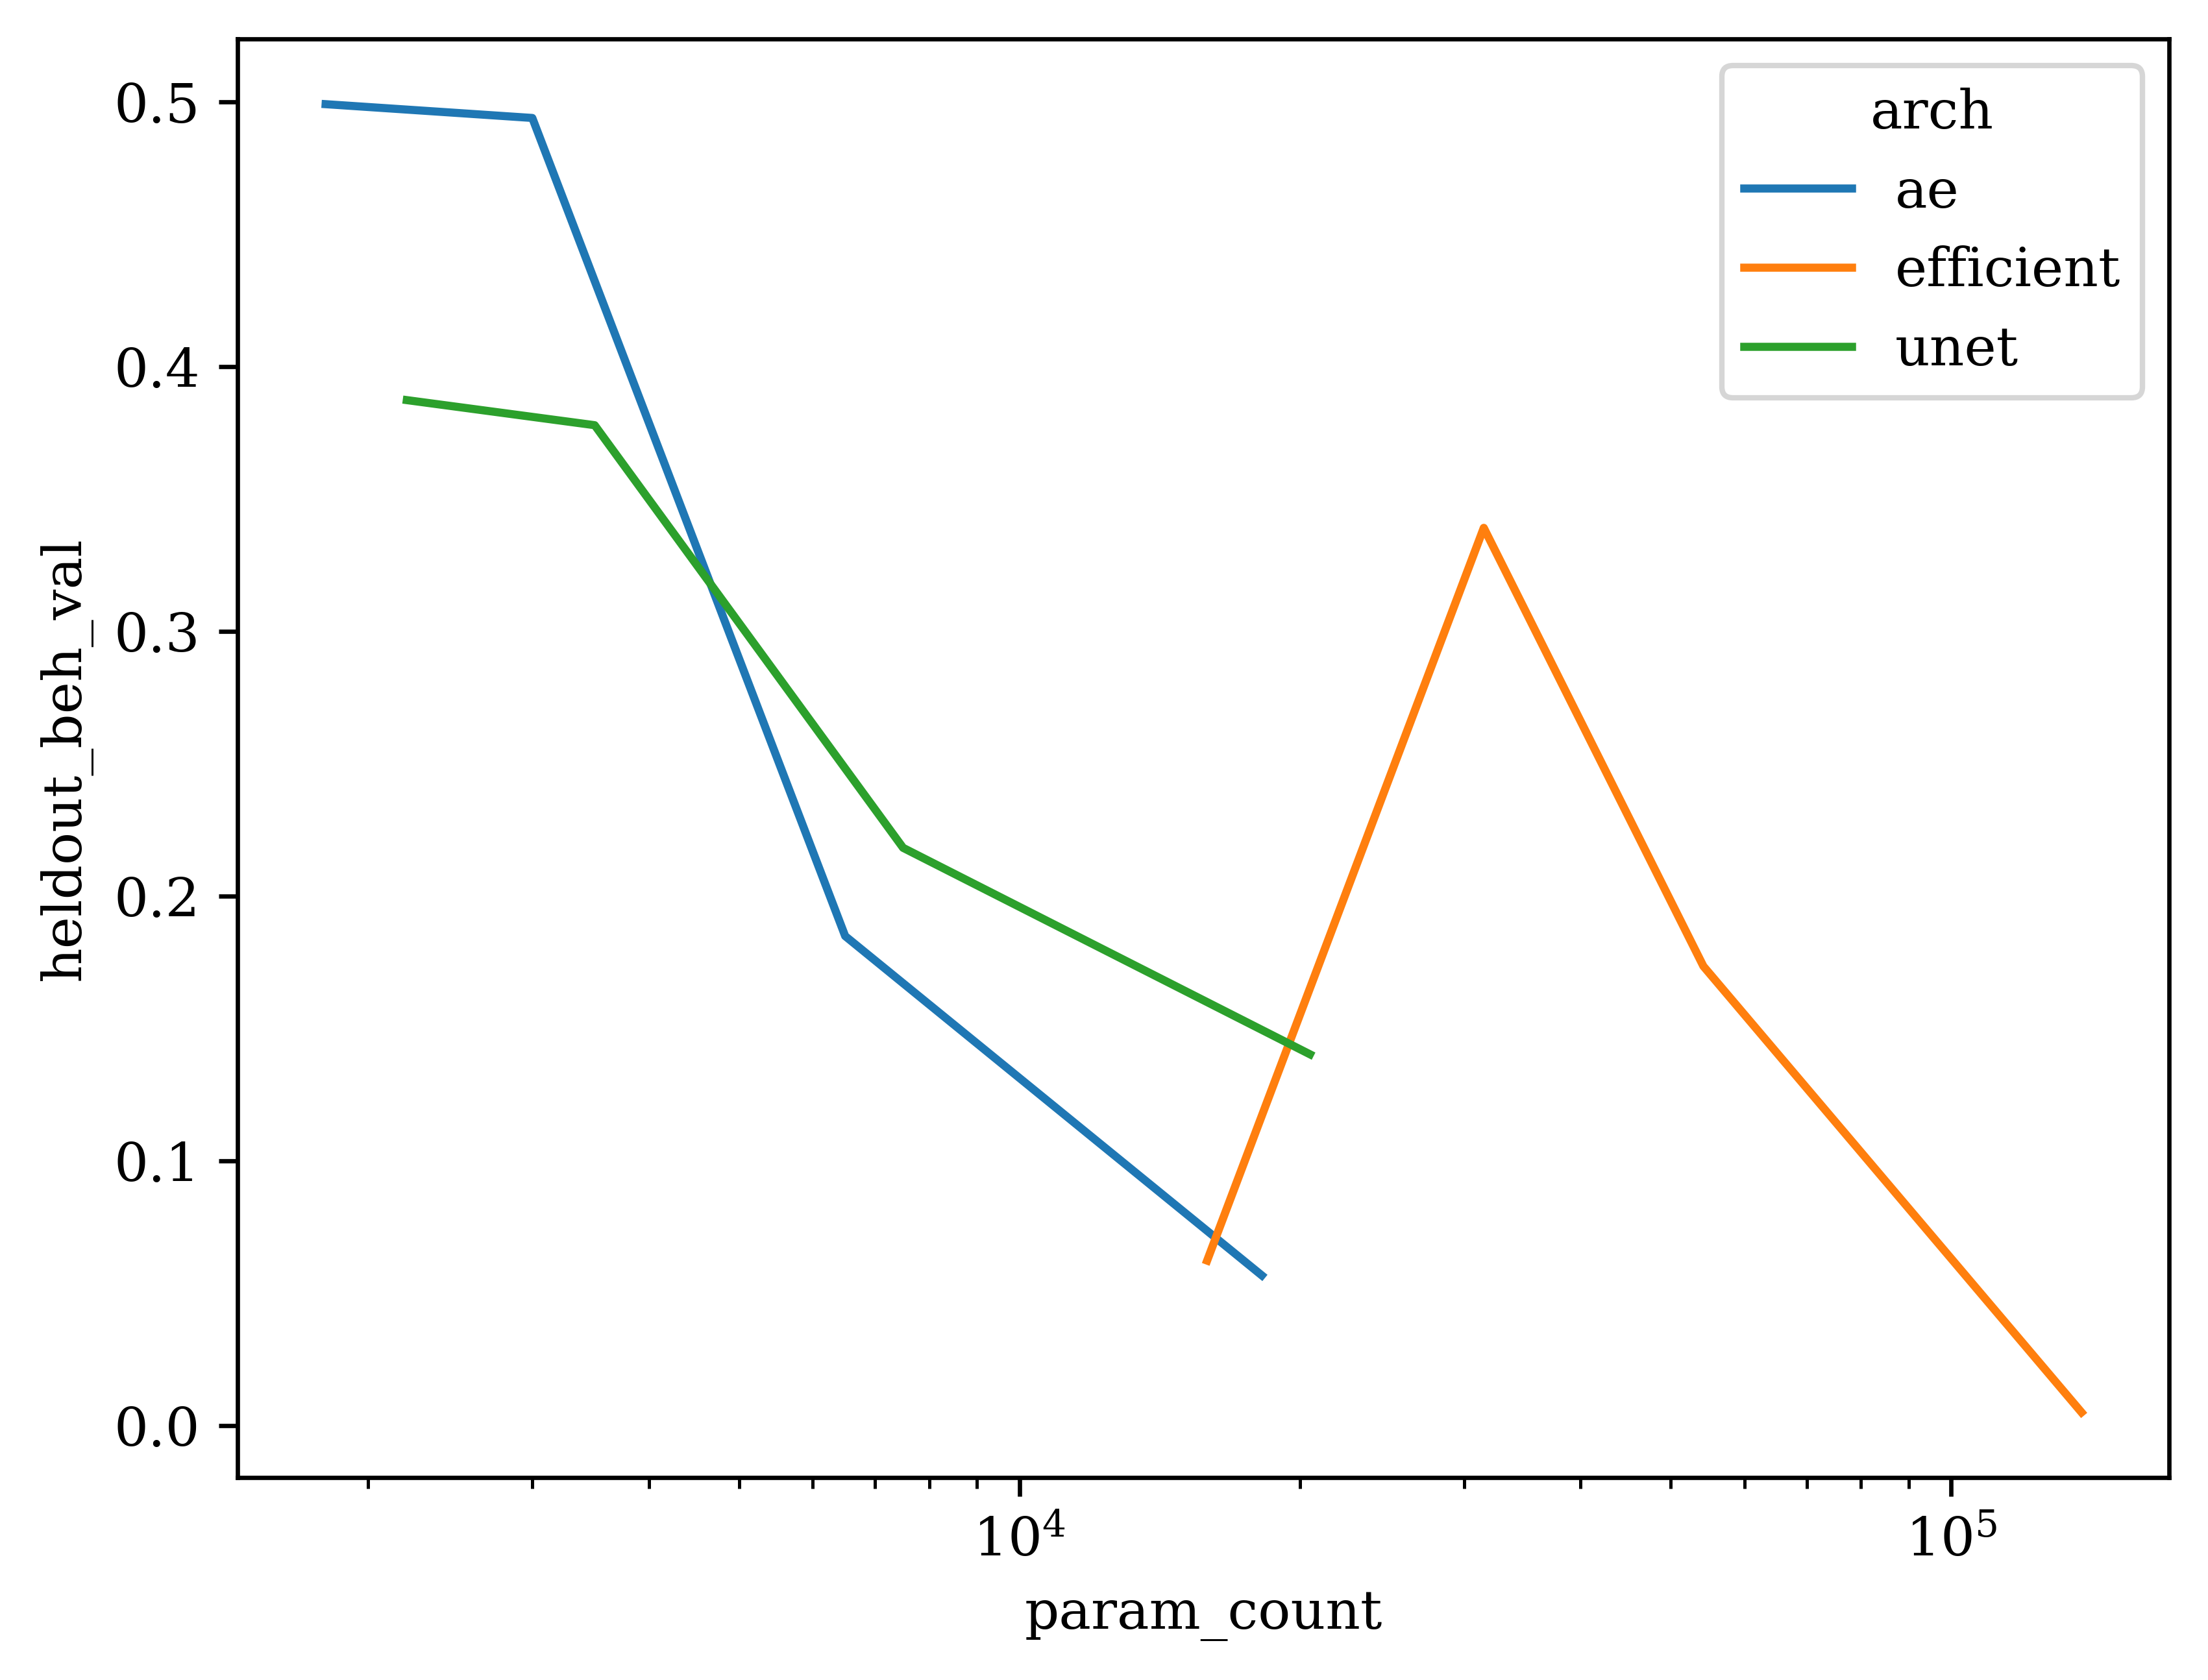

In [51]:
ax = sns.lineplot(data=results, x='param_count', y='heldout_beh_val', hue='arch')
ax.set(xscale='log')

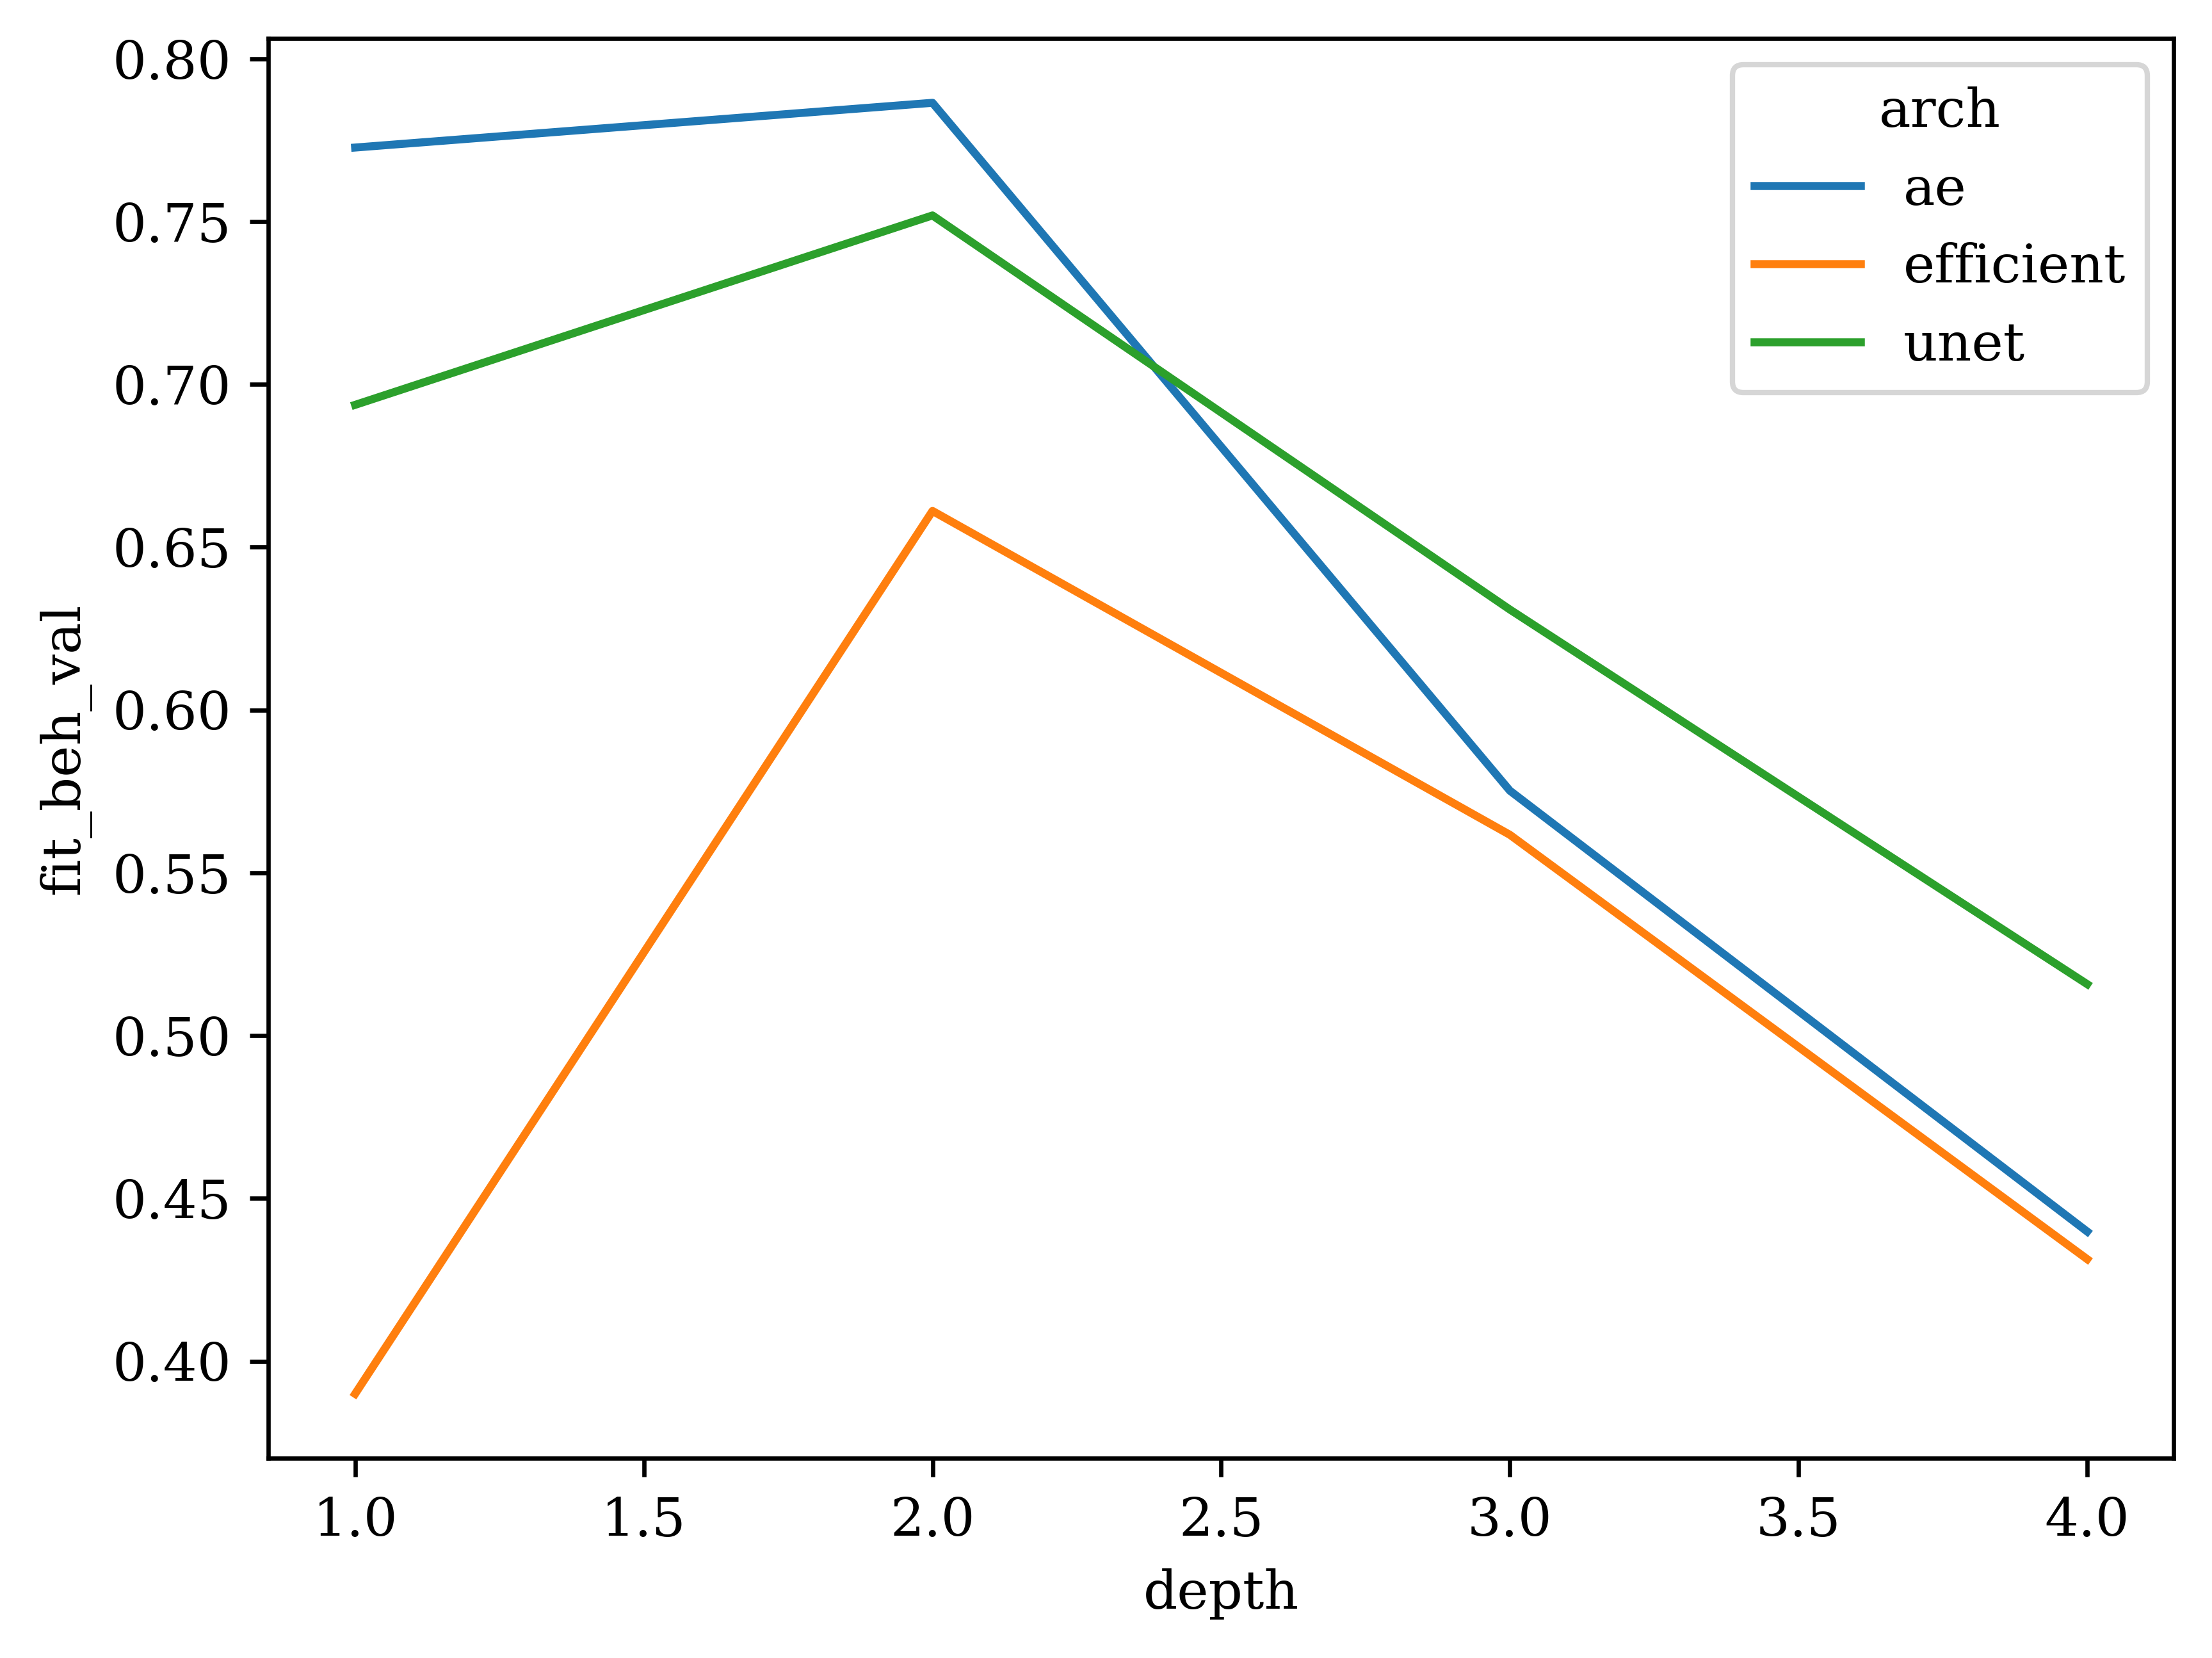

In [53]:
ax = sns.lineplot(data=results, x='depth', y='fit_beh_val', hue='arch')

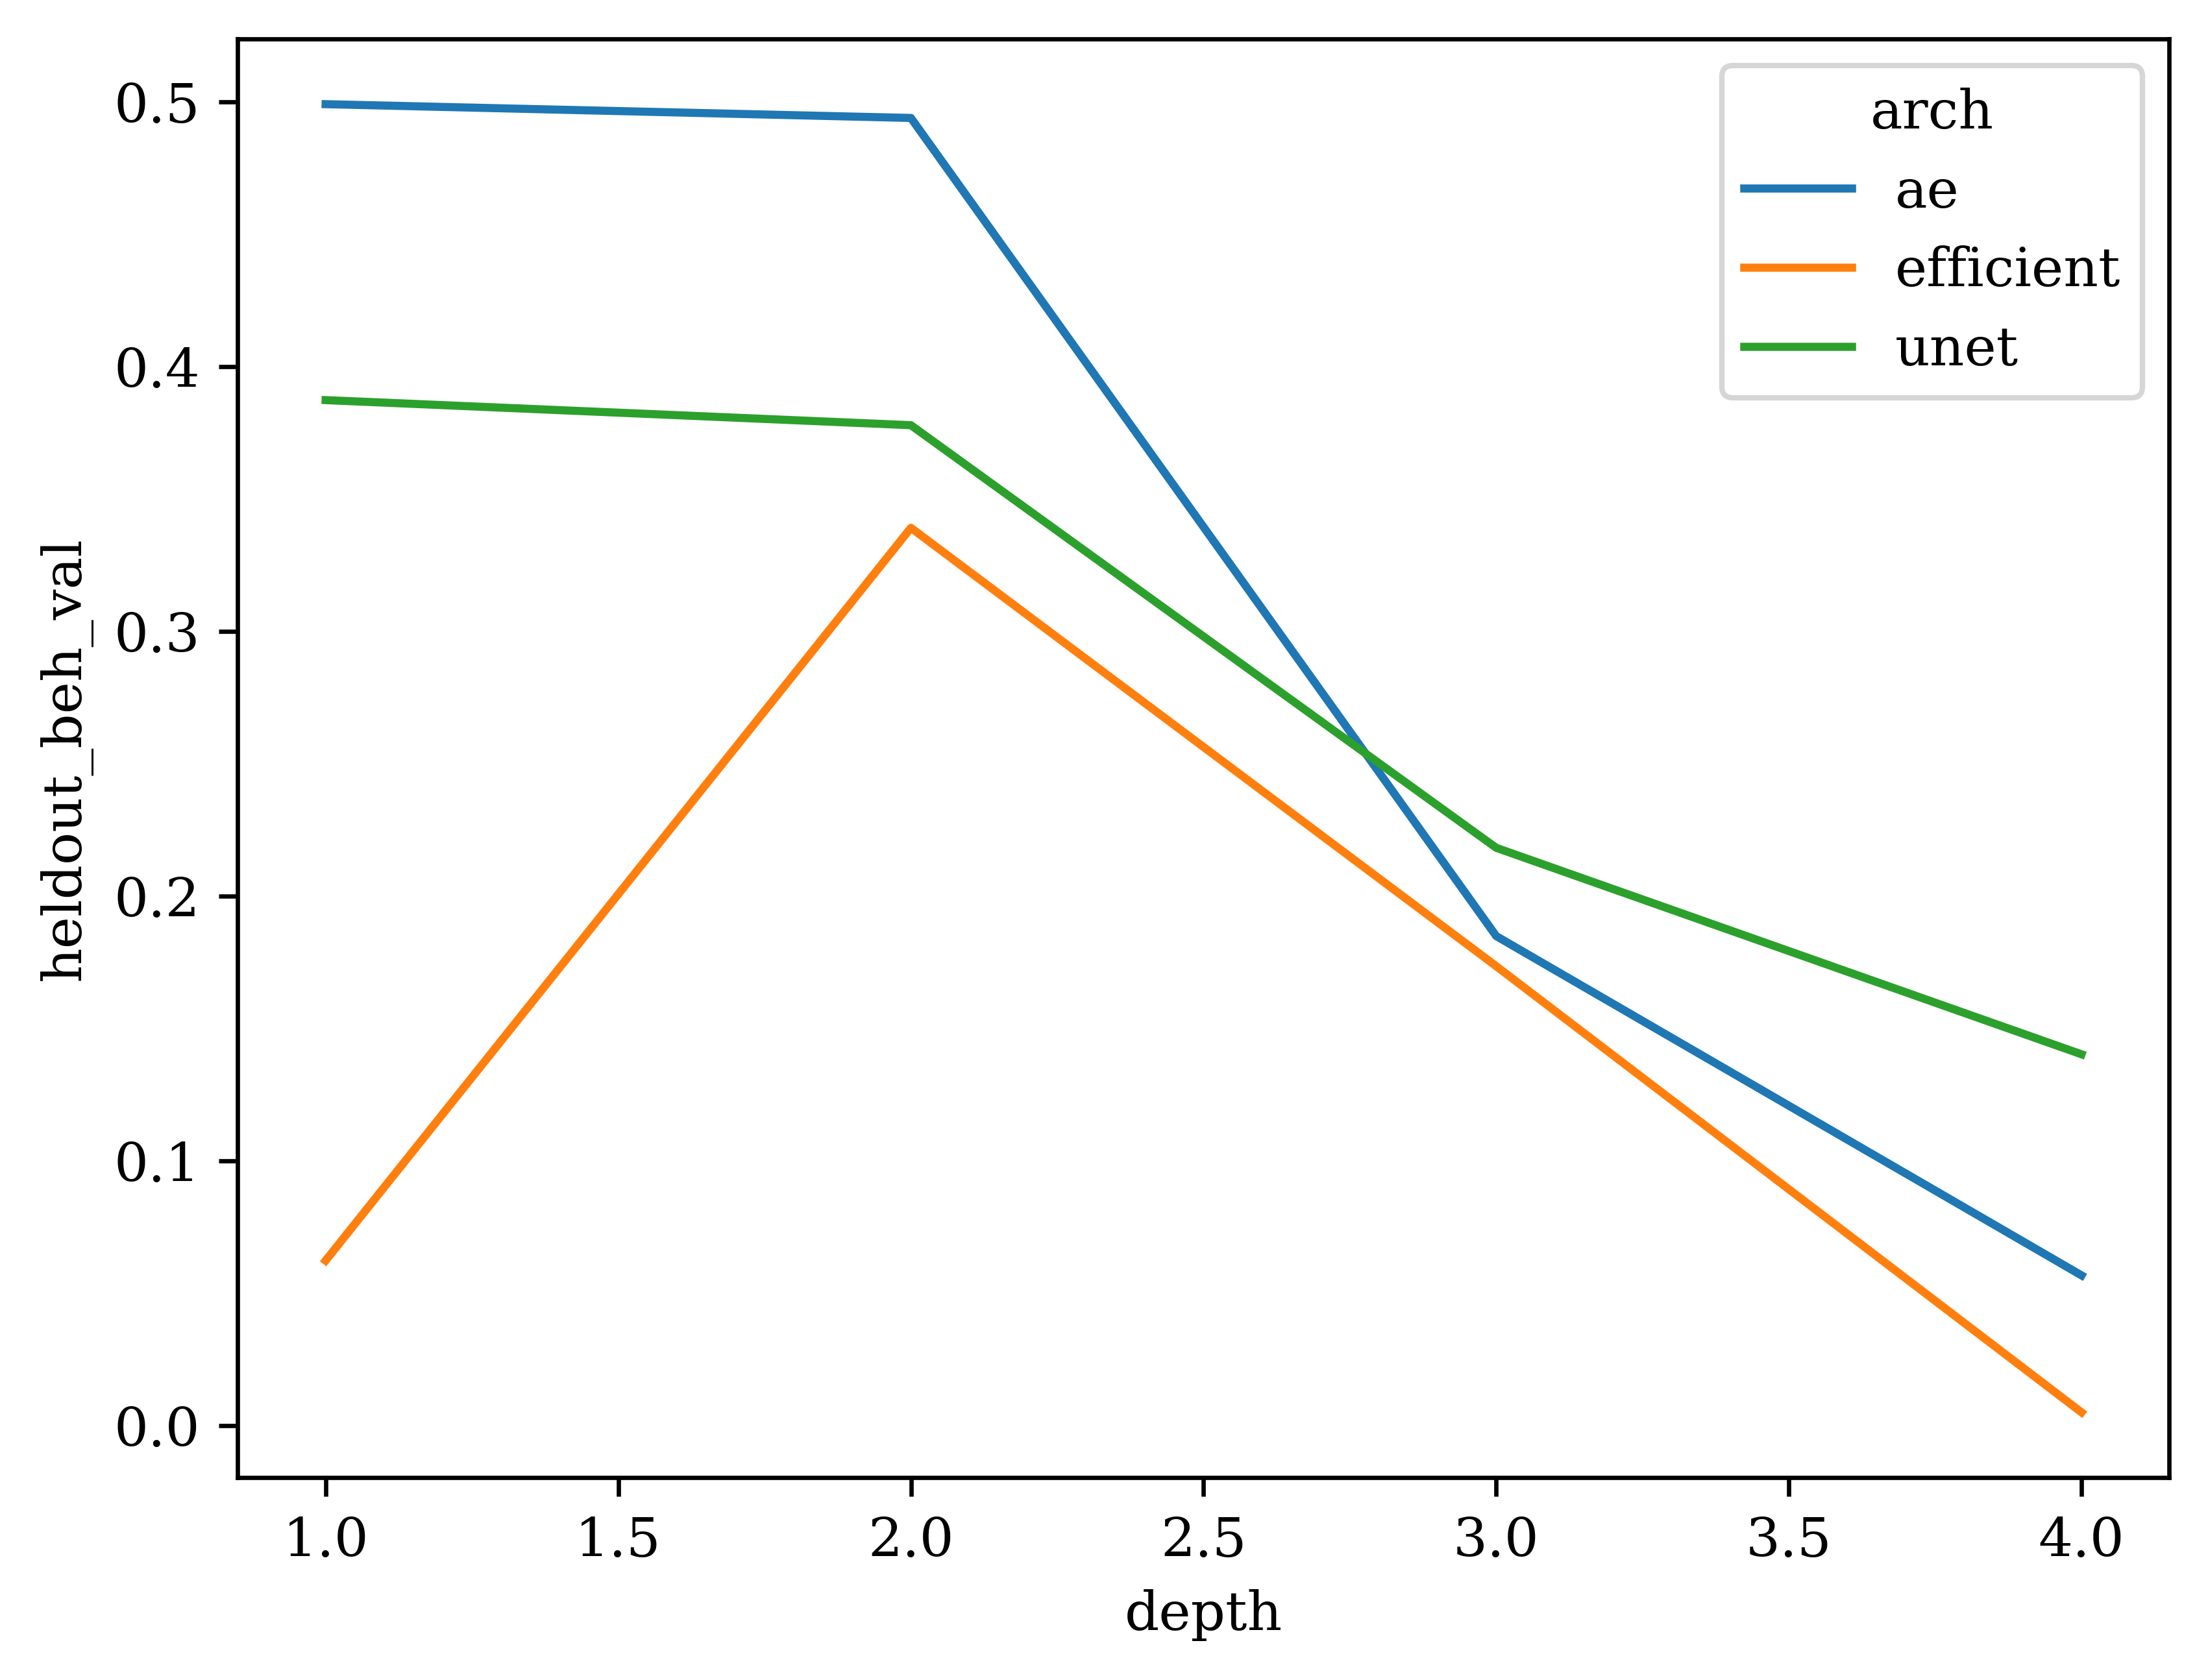

In [54]:
ax = sns.lineplot(data=results, x='depth', y='heldout_beh_val', hue='arch')